In [5]:
import fgmax_refinement_setup as fgrr
from clawpack.geoclaw import topotools
import numpy as np

In [10]:
import os
print(os.getcwd())

/home/catherinej/BarrierIslandBreach/model_input


In [6]:
# Import bathymetry data into topography class
# Crop bathymetry if needed to just the single region
bathy_path = '/home/catherinej/bathymetry/moriches.nc'
topo = topotools.read_netcdf(bathy_path)
# region = [-72.885652,-72.634247,40.718299,40.828344]
region = [-72.88, -72.65, 40.72, 40.83]
topo_crop = topo.crop(region)
topo_crop.X.shape
# fgrr.plot_topo(topo_crop.X, topo_crop.Y, topo_crop.Z)

(1188, 2484)

Selecting points with Z1 = 0, Z2 = 7, max_iters=2950992
Done after 552 iterations with 2267150 points chosen


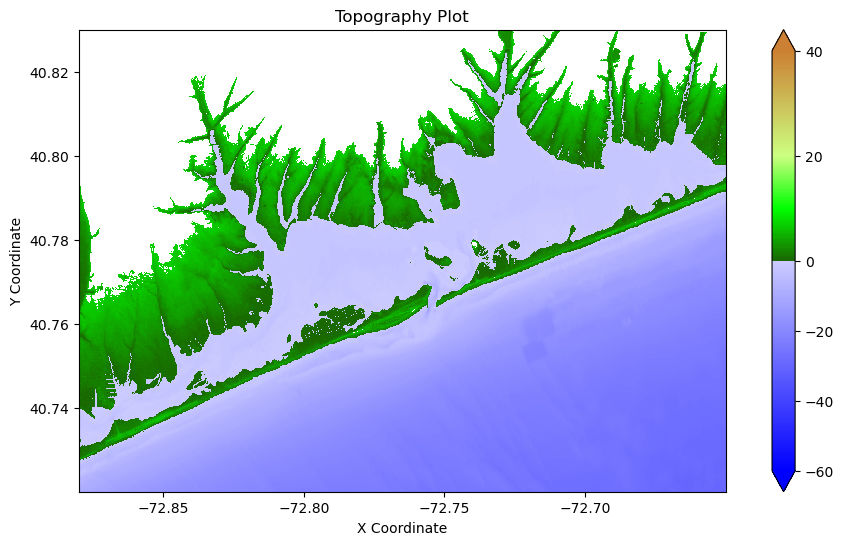

Selecting points with Z1 = 0, Z2 = -9, max_iters=2950992
Done after 158 iterations with 2043421 points chosen


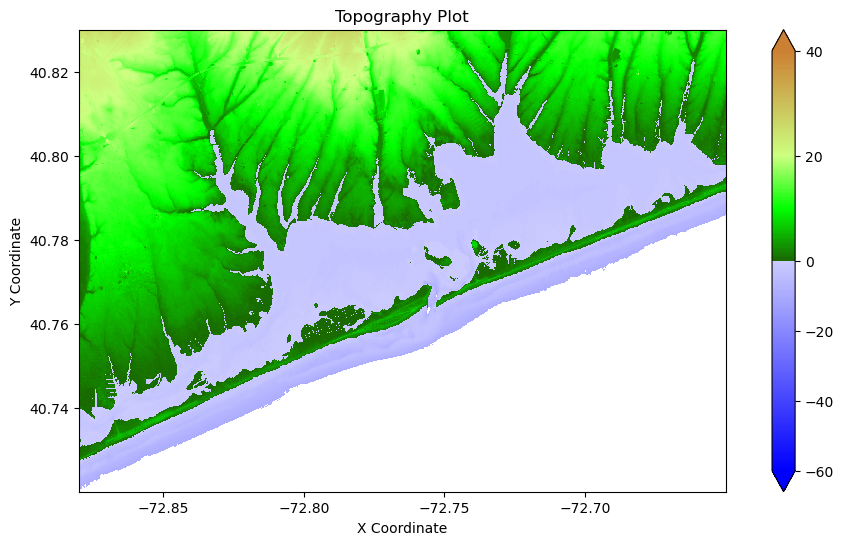

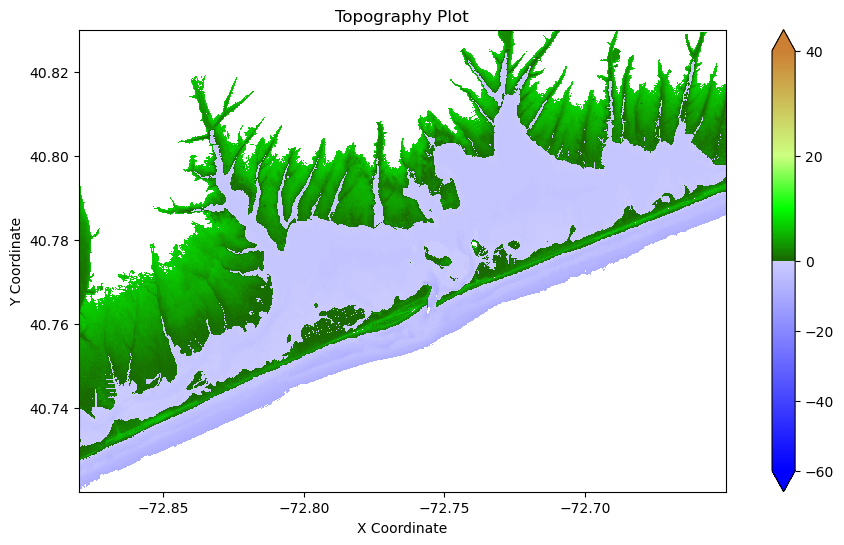

In [7]:
# Create an irregular region for refinement to speed up
# Geoclaw's simulation time. Cropping out topography 
# so that the region isn't a rectangle saves at least 13hours
# of simualtion time for Moriches, NY
pts_chosen, shallow_mask = fgrr.create_refine_region(
    topo_crop, z_depth=-9, z_height=7)

In [8]:
# Create a mask for the wet cells from shallow_mask. This will help with data analysis later
np.savez_compressed('data/mask_ocean_v2.npz', data=shallow_mask.data,
                   mask=shallow_mask.mask)

Extending rectangles to cover grid cells
RuledRectangle covers 1468526 grid points
Extending rectangles to cover grid cells
RuledRectangle covers 1726108 grid points


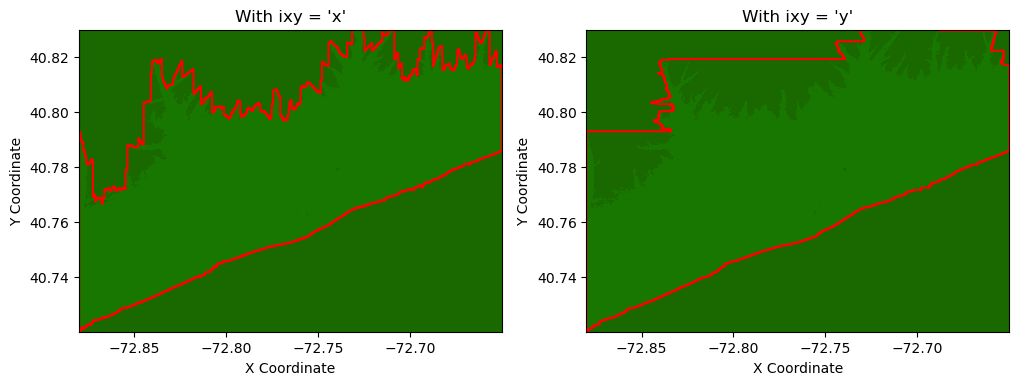

In [5]:
# determine which ixy method works best for this region
fgrr.compare_ixy(topo_crop, pts_chosen)

In [6]:
# Since ixy = x seems to be a smaller region closely packed
# to the coast use ixy=x and 
# Write out refinement region to file, to be used in setrun.py
fgrr.write_rr_file(topo_crop, pts_chosen, 'data/moriches_RR', ixy_method='x')

Extending rectangles to cover grid cells
RuledRectangle covers 1468526 grid points


In [7]:
# Write out the same region to an fgmax file for tracking 
# surge across the bay and coast
outfile = 'data/moriches_fgmax'
fgrr.create_fgmax_file(pts_chosen, topo_crop, outfile)

Created data/moriches_fgmax.data


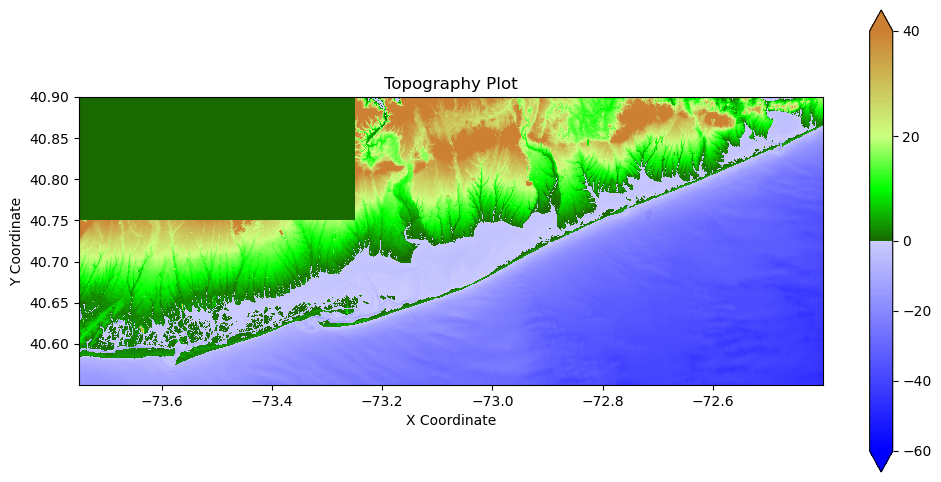

In [9]:
# Create another refinement region for a larger area, in 
# this case the entire NY barrier island system
topo_path = '/home/catherinej/bathymetry/NY_island.nc'
island_topo = topotools.read_netcdf(topo_path)
ny_region = [-73.75, -72.4, 40.55, 40.90]
topo2 = island_topo.crop(ny_region)
fgrr.plot_topo(topo2.X, topo2.Y, topo2.Z)

Selecting points with Z1 = 0, Z2 = 3, max_iters=55112400
Done after 301 iterations with 30281468 points chosen


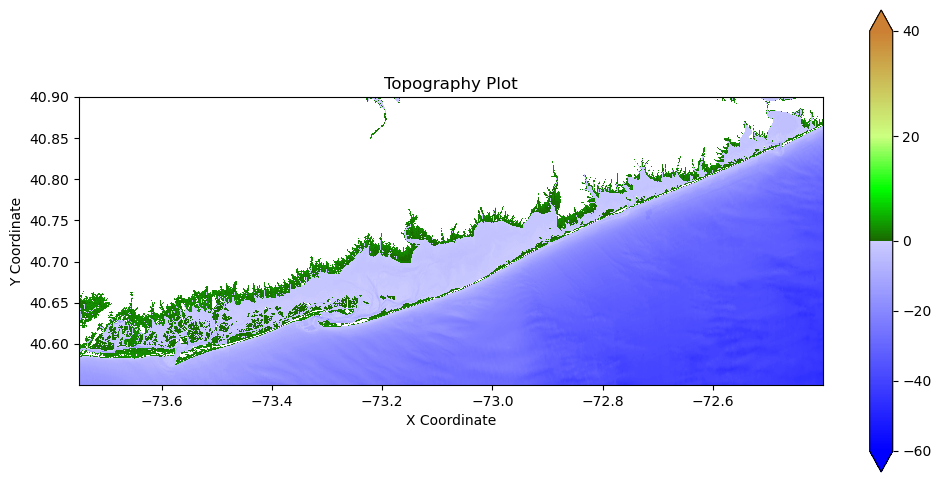

Selecting points with Z1 = 0, Z2 = -4, max_iters=55112400
Done after 1619 iterations with 33309898 points chosen


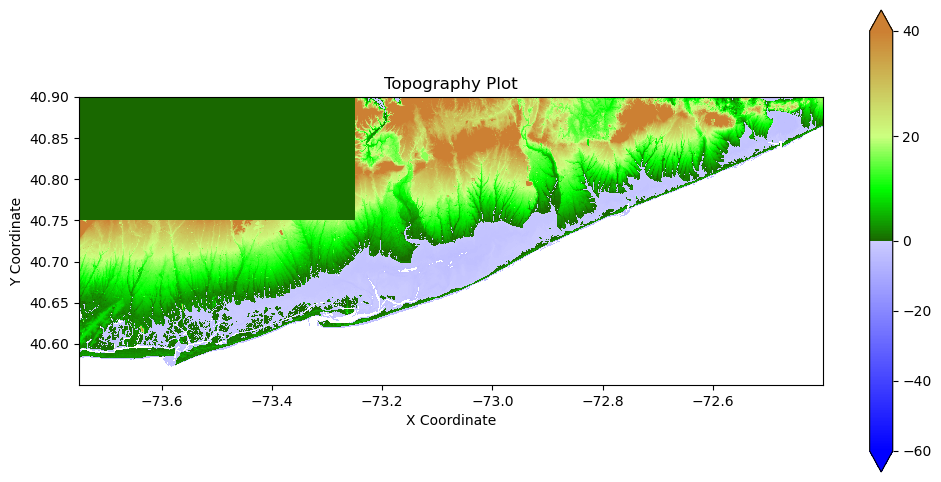

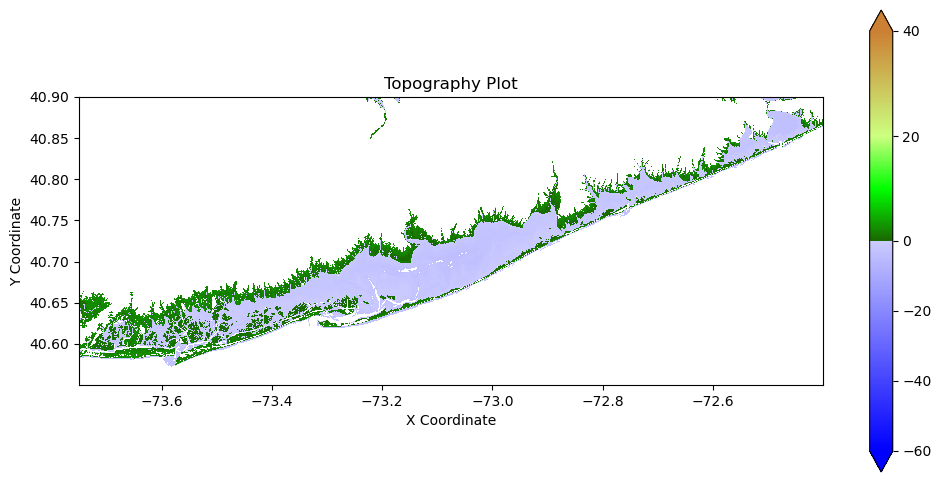

In [13]:
island_pts, _ = fgrr.create_refine_region(topo2, z_depth=-4, z_height=3)

Extending rectangles to cover grid cells
RuledRectangle covers 11032800 grid points
Extending rectangles to cover grid cells
RuledRectangle covers 15693912 grid points


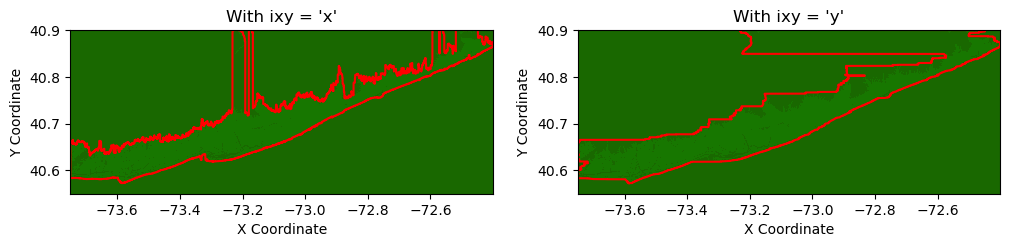

In [14]:
fgrr.compare_ixy(topo2, island_pts)

In [16]:
filename = 'data/NY_barrier_RR'
fgrr.write_rr_file(topo2, island_pts, filename, ixy_method='x')

Extending rectangles to cover grid cells
RuledRectangle covers 11032800 grid points
